In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import os
import xlwings as xw


In [2]:
minerals = ["Manganese", "Lithium", "Cobalt", "Nickel"]
data_directory = "./data" # Set this to your own directory


top_reserves_by_mineral = pd.read_csv(os.path.join(data_directory, "ReservesByMineral.csv"))
reserves_totals = top_reserves_by_mineral.groupby('Mineral', as_index=False)["Aggregate Reserves & Resources (tonnes)"].agg('sum')

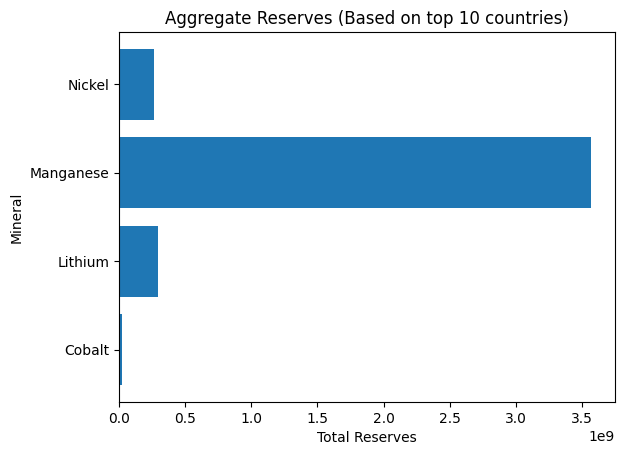

In [3]:
plt.figure()
plt.barh(y = reserves_totals['Mineral'], width = reserves_totals["Aggregate Reserves & Resources (tonnes)"])
plt.title("Aggregate Reserves (Based on top 10 countries)")
plt.xlabel("Total Reserves")
plt.ylabel("Mineral")
plt.show()

In [271]:

combined = None

mining_path = os.path.join(data_directory, "SPGlobal_MetalsAndMiningProperties-Combined-Dec-2024.xlsx")
for i, mineral in enumerate(minerals):
    data = pd.read_excel(mining_path, sheet_name = mineral)
    print(f"Read {mineral}")

    # data.dropna(subset="Primary Reserves and Resources", inplace = True)
    data["Reserves & Resources As Of Date"] = pd.to_datetime(data["Reserves & Resources As Of Date"])
    data["Primary Mineral"] = mineral
    data["Year"] = data["Reserves & Resources As Of Date"].dt.year


    if i == 0:
        combined = data
        continue

    combined = pd.concat([combined, data], ignore_index=True)

combined = combined.sort_values(by = "Year").query("`Activity Status` == 'Active'")
combined["Property ID"] = combined["Property ID"].astype(int)


Read Manganese
Read Lithium
Read Cobalt
Read Nickel


Index(['Country/Region', 'Development Stage', 'Activity Status'], dtype='object')

In [281]:
locations = pd.read_excel("data/MiningPropertyLocations.xlsx")
locations = locations[["KeyMineProject","Latitude (degrees)", "Longitude (degrees)"]]

combined = combined.merge(locations, left_on = "Property ID", right_on="KeyMineProject" ,how = "inner")
combined

,Property,Property ID,Owner(s),Country/Region,Country/Region Risk Score & Outlook,Development Stage,Activity Status,Commodity(s),Primary Reserves and Resources,Unit,Total In-Situ Value ($M),Reserves & Resources As Of Date,Primary Mineral,Year,KeyMineProject_x,Latitude (degrees)_x,Longitude (degrees)_x,KeyMineProject_y,Latitude (degrees)_y,Longitude (degrees)_y
0,Lithium Two,79958,"New Age Metals Inc., Mineral Resources Ltd.",Canada,1.4 Moderate - No Change,Target Outline,Active,"Lithium, Caesium, Rubidium, Tantalum",7600,tonnes,123.180800,1947-12-31,Lithium,1947,79958,50.61363,-95.46443,79958,50.61363,-95.46443
1,Falcon West,90157,Grid Metals Corp.,Canada,1.4 Moderate - No Change,Target Outline,Active,"Lithium, Caesium, Tantalum, Rubidium",4000,tonnes,64.832000,1955-12-31,Lithium,1955,90157,49.56729,-95.68944,90157,49.56729,-95.68944
2,Irgon,79892,QMC Quantum Minerals Corp,Canada,1.4 Moderate - No Change,Target Outline,Active,"Lithium, Tantalum",16420,tonnes,266.135360,1956-12-31,Lithium,1956,79892,50.60720,-95.39696,79892,50.60720,-95.39696
3,Chrome-Puddy,89842,"Green Bridge Metals Corp., Pavey Ark Minerals...",Canada,1.4 Moderate - No Change,Exploration,Active,"Nickel, Chromium, Copper, Cobalt, Platinum, Ir...",73482,tonnes,1384.357942,1966-12-31,Nickel,1966,89842,49.96907,-89.52303,89842,49.96907,-89.52303
4,Chrome-Puddy,89842,"Green Bridge Metals Corp., Pavey Ark Minerals...",Canada,1.4 Moderate - No Change,Exploration,Active,"Nickel, Chromium, Copper, Cobalt, Platinum, Ir...",4627,tonnes,1384.357942,1966-12-31,Cobalt,1966,89842,49.96907,-89.52303,89842,49.96907,-89.52303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Foster,88835,Lunnon Metals Ltd.,Australia,1.4 Moderate - No Change,Prefeas/Scoping,Active,"Nickel, Cobalt, Copper, Gold, Palladium, Plati...",1468,tonnes,2022.845594,2024-06-11,Cobalt,2024,88835,-31.34536,121.74359,88835,-31.34536,121.74359
582,Selkirk,27655,"Premium Resources Ltd., Botswana",Botswana,1.8 Elevated - No Change,Feasibility,Active,"Nickel, Copper, Cobalt, Platinum, Palladium, Gold",108000,tonnes,3939.211657,2024-11-01,Nickel,2024,27655,-21.29955,27.73351,27655,-21.29955,27.73351
583,Alexo-Dundonald,33464,Class 1 Nickel & Technologies,Canada,1.4 Moderate - No Change,Reserves Development,Active,"Nickel, Copper, Cobalt, Gold, Platinum, Palladium",1449,tonnes,970.740384,2024-10-01,Cobalt,2024,33464,48.65369,-80.80783,33464,48.65369,-80.80783
584,Aguablanca,29064,"Denarius Metals Corp., Private Interest",Spain,1.9 Elevated - No Change,Prefeas/Scoping,Active,"Nickel, Copper, Cobalt, Platinum, Palladium, G...",897,tonnes,1036.531600,2024-03-24,Cobalt,2024,29064,37.96111,-6.18528,29064,37.96111,-6.18528


In [282]:
start_year = 2010
combined = combined[combined["Year"] >= start_year]

In [41]:
from io import StringIO
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error


d = """
Year,Capacity
2010,14
2011,28
2012,38
2013,56
2014,75
2015,85
2016,111
2017,198
2018,293.7
2022,1570
2025,3970
2030,6790
"""

df = pd.read_csv(StringIO(d))
df["log_capacity"] = np.log(df["Capacity"])
df

,Year,Capacity,log_capacity
0,2010,14.0,2.639057
1,2011,28.0,3.332205
2,2012,38.0,3.637586
3,2013,56.0,4.025352
4,2014,75.0,4.317488
5,2015,85.0,4.442651
6,2016,111.0,4.709530
7,2017,198.0,5.288267
8,2018,293.7,5.682559
9,2022,1570.0,7.358831


Best degree: 3 with RMSE 0.15105632961085044


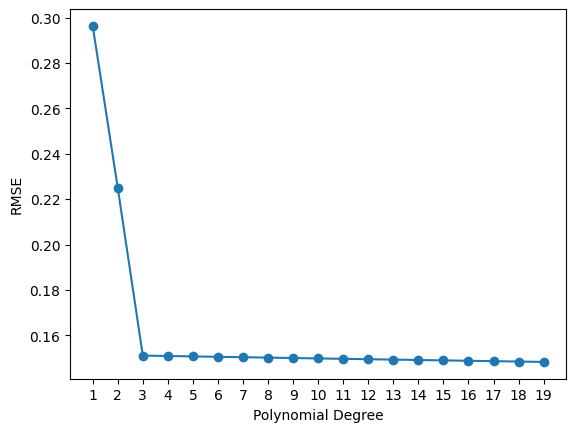

[[ 0.00000000e+00 -1.10772606e+04  5.49055450e+00 -9.07116281e-04]] [7449236.86970825]


In [42]:
errors = []
models = []
transforms = []
r = np.arange(1,20)
for d in r:
    poly = PolynomialFeatures(degree=d, include_bias=True)
    transforms.append(poly)
    X = poly.fit_transform(df[["Year"]], df["log_capacity"])
    reg = LinearRegression()
    reg.fit(X, df[["log_capacity"]].values)
    models.append(reg)
    rmse = root_mean_squared_error(df["log_capacity"],reg.predict(X))
    errors.append(rmse)


errors = np.array(errors)
differences = np.abs(np.diff(errors))
threshold = 0.001
best_index = np.argmax(differences[differences > 0] < threshold)
best_poly = transforms[best_index]
best_model = models[best_index]
print(f"Best degree: {best_index + 1} with RMSE {errors[best_index]}")

plt.plot(errors, marker="o")
plt.xticks(r - 1,labels=r)
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.show()

print(best_model.coef_, best_model.intercept_)

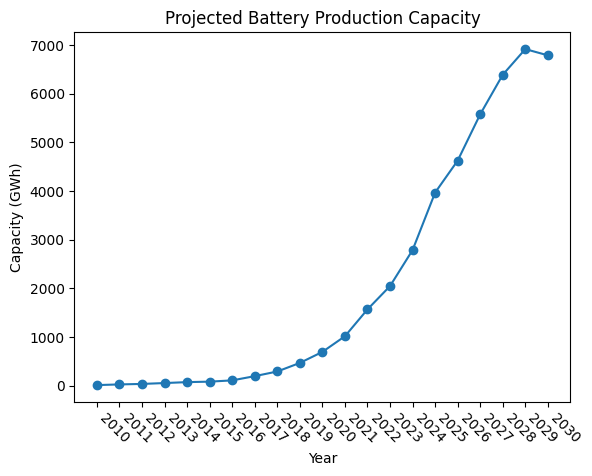

In [43]:
year_range = np.arange(df["Year"].min(), df["Year"].max())

p2 = pd.DataFrame(year_range[~np.isin(year_range, df["Year"])], columns=["Year"])
p2["log_capacity"] = best_model.predict(best_poly.transform(p2[["Year"]]))
p2["Capacity"] = np.exp(p2[["log_capacity"]])
df_full = pd.concat([df, p2], axis=0).sort_values("Year").reset_index(drop=True)
# df_full.to_excel(os.path.join(data_directory, "Capacity.xlsx"),  sheet_name="Projected Capacity", index=False)

ax = df_full.plot(x="Year", y="Capacity", marker="o")
ax.set_ylabel("Capacity (GWh)")
ax.set_xticks(df_full["Year"], df_full["Year"])
ax.tick_params(axis='x', rotation=-45)
for label in ax.get_xticklabels():
    label.set_ha('left')

plt.legend().remove()
plt.title("Projected Battery Production Capacity")
plt.show()

In [283]:
reserves_over_time = combined \
        .groupby(["Reserves & Resources As Of Date", "Primary Mineral"], as_index = False)["Primary Reserves and Resources"] \
        .agg("sum")


fig = px.line(reserves_over_time, x="Reserves & Resources As Of Date", facet_col = "Primary Mineral",
        y="Primary Reserves and Resources", log_y = True, facet_col_wrap=2, facet_row_spacing=0.2)

fig.update_xaxes(title_text="Date")
fig.update_layout(title = "Total Reserves Over the Years")
fig.update_yaxes(title_text=None)
fig.show()

In [284]:
D = combined[["Year","Primary Mineral", "Primary Reserves and Resources"]]

D = D.groupby(["Year","Primary Mineral"], as_index=False).agg("sum")


# Generate a complete set of Year-Mineral combinations
all_years = D["Year"].unique()
all_minerals = D["Primary Mineral"].unique()
complete_index = pd.MultiIndex.from_product([all_years, all_minerals], names=["Year", "Primary Mineral"])

# Reindex the DataFrame to include all combinations, filling missing values with 0
D = D.set_index(["Year", "Primary Mineral"]).reindex(complete_index, fill_value=0).reset_index()

D["Cumulative Reserves"] = D.groupby(["Primary Mineral"], as_index=False)["Primary Reserves and Resources"].agg("cumsum")



In [285]:
# Extend to Future Years
for yr in range(2025, 2030+1):
    latest = D[D["Year"]==2024]
    latest.loc[:,"Year"] = yr
    
    D = pd.concat([D, latest], axis=0)

    

In [286]:
frame_duration = 1000  # Duration for each frame
transition_duration = 500  # Duration for transitions


sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "left"
    },
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

buttons_dict = [{"buttons": [
                {'args': [None,
                          {
                              'frame': {
                                  'duration': frame_duration,
                                  'redraw': True
                              },
                              'mode': 'immediate',
                              'fromcurrent': True,
                              'transition': {
                                  'duration': transition_duration,
                                  'easing': 'linear'
                              }
                          }
                          ],
                 'label': '&#9654;',
                 'method': 'animate'},
                {'args': [[None],
                          {'frame': {'duration': 0, 'redraw':True}, 
                           'mode': 'immediate',
                           'fromcurrent': True,
                           'transition': {'duration': transition_duration,
                                          'easing': 'linear'}
                           }],
                    'label': '&#9724;',
                    'method': 'animate'}
                ],
    "direction": "left",
    "pad": {"r": 10, "t": 70},
    "showactive": False,
    "type": "buttons",
    "x": 0.1,
    "xanchor": "right",
    "y": 0.,
    "yanchor": "top"
}
]

In [53]:
chem_comparisons = xw.Book("data/battery_chemistry_comparisons.xlsx", mode="i")
mass = chem_comparisons.sheets[1]
for i, v in df_full.iterrows():
    mass.range(f"B2").value = v["Capacity"]
    
    nmc_cols = mass.range("A6:A9")
    nmc = mass.range("K5:N9").options(pd.DataFrame, index=False).value
    nmc.index = nmc_cols.value
    nmc_li_2 = mass.range("P6:S6").options(pd.DataFrame, header=False, index=False).value
    nmc_li_2.index = ["Li+"]
    nmc_li_2.columns = nmc.columns
    nmc = pd.concat([nmc, nmc_li_2], axis=0)
    
    nmc.columns = nmc.columns.str.replace("in ", "", regex=True)
    nmc.insert(0, "Year", int(v["Year"]))
    
    lib_cathode_cols = mass.range("A16:A28")
    elem_cols2 = ["Li", "Co", "Mn",	"Ni", "Li+"]
    lib_cathodes = mass.range("I16:N28").options(pd.DataFrame, transpose=True, 
                                      header=False, index=False)
    cathode_df = lib_cathodes.value
    cathode_df.dropna(how='all', inplace=True)
    cathode_df.columns = lib_cathode_cols.value
    cathode_df.index = elem_cols2
    full = nmc.join(cathode_df)
    full.index.name ='Element'
    
    full.reset_index(inplace=True)
    if i == 0:
        cathodes = full
        continue
        
    cathodes = pd.concat([cathodes, full], ignore_index=True)
        
        
cathodes['+'] = cathodes['Element'] == "Li+"
cathodes

elem_map = {"Li": "Lithium", "Li+": "Lithium", "Co": "Cobalt", "Mn": "Manganese", "Ni": "Nickel"}
cathodes.drop("Full Element Name", axis=1, inplace=True, errors="ignore")
cathodes.insert(2, "Full Element Name",cathodes["Element"].map(elem_map))
with pd.ExcelWriter(os.path.join(data_directory, "Capacity.xlsx"), mode='a', if_sheet_exists='replace') as writer:
    cathodes.to_excel(writer, index=False, sheet_name="Demand by Cathode")
    
    

In [287]:

demand_by_cathode = pd.read_excel(os.path.join(data_directory, "Capacity.xlsx"), sheet_name="Demand by Cathode")
demand_by_cathode = demand_by_cathode[demand_by_cathode.Element != "O"]

demand_by_cathode = demand_by_cathode[~((demand_by_cathode.Element == "Li") & (demand_by_cathode["+"] == False))]
demand_by_cathode.drop(["Element", "+"], axis=1, inplace=True)

demand_by_cathode = demand_by_cathode.iloc[:,:-5] # Last 5 are redundant


In [288]:
available_years = D.Year.unique()
animation = go.Figure()

sliders_dict["steps"].clear()

frames =  []
xvar = "Cumulative Reserves"
for i, yr in enumerate(available_years):
    
    sorted_data = D[D.Year == yr]
    fig = px.bar(sorted_data, x = xvar, y = "Primary Mineral" ,color = "Primary Mineral", range_x=[10, 10 * (D[xvar].max())], log_x=True)
    S = demand_by_cathode[demand_by_cathode.Year == yr]


    fig.add_traces([go.Scatter(x=S[col], y=S["Full Element Name"], mode='markers', 
                            marker=dict(size=20), name=col, legend="legend2") for col in S.columns[2:6]])

    fig.update_layout(yaxis=dict(categoryorder="array", categoryarray=D["Primary Mineral"].unique()), title = f"Total Reserves in {yr}", 
                            legend1=dict(title=dict(text="Mineral")),
                            legend2=dict(title=dict(text="NMC Cathodes"),y=-0.005))
    
    
    if i == 0:
        animation.add_traces(fig.data)
        animation.update_layout(fig.layout)
        

    frame = go.Frame(data=fig.data, name=str(yr), layout=fig.layout)
    frames.append(frame)

    slider_step = {"args": [[yr]],"label": str(yr), "method": "animate"}
    sliders_dict['steps'].append(slider_step)

animation.frames = frames
animation.update_layout(updatemenus=buttons_dict,sliders=[sliders_dict])

animation.show()

In [16]:
animation.write_html(file="graphs/nmc_over_time.html")

In [289]:
available_years = D.Year.unique()
animation = go.Figure()

sliders_dict["steps"].clear()
buttons_dict[0]["buttons"][0]["args"][1]["frame"]["duration"] = 1000
buttons_dict[0]["buttons"][0]["args"][1]["transition"]["duration"] = 0
buttons_dict[0]["buttons"][0]["args"][1]["transition"]["easing"] = "linear"


frames =  []
xvar = "Cumulative Reserves"
for i, yr in enumerate(available_years):
    
    sorted_data = D[D.Year == yr]
    fig = px.bar(sorted_data, x = xvar, y = "Primary Mineral" ,color = "Primary Mineral", range_x=[10, 10 * (D[xvar].max())], log_x=True,opacity=0.8)

    S = demand_by_cathode[demand_by_cathode.Year == yr]


    fig.add_traces([go.Scatter(x=S[col], y=S["Full Element Name"], mode='markers', 
                            marker=dict(size=20), name=col, legend="legend2") for col in S.columns[6:]])

    fig.update_layout(yaxis=dict(categoryorder="array", categoryarray=D["Primary Mineral"].unique()), title = f"Total Reserves in {yr}", 
                            legend1=dict(title=dict(text="Mineral")),
                            legend2=dict(title=dict(text="LIB Cathodes"),y=-0.3))
    
    
    if i == 0:
        animation.add_traces(fig.data)
        animation.update_layout(fig.layout)
        

    frame = go.Frame(data=fig.data, name=str(yr), layout=fig.layout)
    frames.append(frame)

    slider_step = {"args": [[yr]],"label": str(yr), "method": "animate"}
    sliders_dict['steps'].append(slider_step)

animation.frames = frames
animation.update_layout(updatemenus=buttons_dict,sliders=[sliders_dict])

animation.show()

In [31]:
animation.write_html(file="graphs/lib_over_time.html")

In [17]:
import xlwings as xw
wb = xw.Book("BatPaC 5.1 2023-08-14.xlsm", mode="i")
sheets = {name:sheet for name, sheet in zip(wb.sheet_names, wb.sheets)}

validations = sheets["Lists"]
cathode_dropdown = validations.range("B6:B24")
default_cathode = sheets["Dashboard"].range("E13")
default_cathode.value

cathode_dropdown.value



['NMC333-G (Power)',
 'NMC333-G (Energy)',
 'NMC532-G (Power)',
 'NMC532-G (Energy)',
 'NMC622-G (Power)',
 'NMC622-G (Energy)',
 'NMC811-G (Power)',
 'NMC811-G (Energy)',
 'NMC95-G (Power)',
 'NMC95-G (Energy)',
 'NCA-G (Power)',
 'NCA-G (Energy)',
 'LFP-G (Power)',
 'LFP-G (Energy)',
 'LMO-G (Power)',
 'LMO-G (Energy)',
 '50%/50% NMC532/LMO - G',
 'LMO-LTO (Power)',
 'LMO-LTO (Energy)']

In [27]:
demand_by_cathode[demand_by_cathode["Full Element Name"] == mineral]

,Year,Full Element Name,NMC622,NMC811,NMC532,NMC111,LiFePO4,LiCoO2,LiCo2O4,LiTiS2,LiMn2O4,LiMnO2,LiNiO2,LiNiCoAlO2(0.8:0.15:0.05)
2,2010,Manganese,1551.214486,775.607243,2.326822e+03,7.756072e+03,NaN,NaN,NaN,NaN,1.399876e+04,8.696202e+03,NaN,NaN
7,2011,Manganese,3102.428973,1551.214486,4.653643e+03,1.551214e+04,NaN,NaN,NaN,NaN,2.799753e+04,1.739240e+04,NaN,NaN
12,2012,Manganese,4210.439320,2105.219660,6.315659e+03,2.105220e+04,NaN,NaN,NaN,NaN,3.799665e+04,2.360398e+04,NaN,NaN
17,2013,Manganese,6204.857946,3102.428973,9.307287e+03,3.102429e+04,NaN,NaN,NaN,NaN,5.599506e+04,3.478481e+04,NaN,NaN
22,2014,Manganese,8310.077606,4155.038803,1.246512e+04,4.155039e+04,NaN,NaN,NaN,NaN,7.499338e+04,4.658680e+04,NaN,NaN
27,2015,Manganese,9418.087954,4709.043977,1.412713e+04,4.709044e+04,NaN,NaN,NaN,NaN,8.499250e+04,5.279837e+04,NaN,NaN
32,2016,Manganese,12298.914857,6149.457429,1.844837e+04,6.149457e+04,NaN,NaN,NaN,NaN,1.109902e+05,6.894846e+04,NaN,NaN
37,2017,Manganese,21938.604880,10969.302440,3.290791e+04,1.096930e+05,NaN,NaN,NaN,NaN,1.979825e+05,1.229891e+05,NaN,NaN
42,2018,Manganese,32542.263906,16271.131953,4.881340e+04,1.627113e+05,NaN,NaN,NaN,NaN,2.936741e+05,1.824339e+05,NaN,NaN
47,2019,Manganese,52041.135129,26020.567564,7.806170e+04,2.602057e+05,NaN,NaN,NaN,NaN,4.696395e+05,2.917458e+05,NaN,NaN


In [291]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

F = make_subplots(rows=2, cols=2, x_title="Year", y_title="Reserves", subplot_titles=[mineral for mineral in D["Primary Mineral"].unique()])

# Define a fixed color mapping for cathode types

cathode_colors = {"NMC111": "blue", "NMC532": "green", "NMC622": "orange", "NMC811": "purple"}
mineral_colors =  ['#636efa','#EF553B', '#00cc96', '#ab63fa']

for i, mineral in enumerate(D["Primary Mineral"].unique()):
    M = D.loc[(D["Primary Mineral"] == mineral) & (D["Cumulative Reserves"] > 0)]
    S = demand_by_cathode[demand_by_cathode["Full Element Name"] == mineral]
    
    # Add the main mineral trace with its own legend group
    F.add_trace(
        go.Scatter(
            x=M["Year"], 
            y=M["Cumulative Reserves"], 
            mode="lines+markers",
            legendgroup=mineral,
            name=mineral,
            fill="toself",
            marker=dict(
                size=10,
                color=mineral_colors[i]
            ), 
            showlegend=True,
            legend="legend1"
        ),
        row=i // 2 + 1, 
        col=i % 2 + 1
    )
    
    # Add cathode traces grouped by cathode type
    for j,cathode in enumerate(S.columns[2:6]):
        F.add_trace(
            go.Scatter(
                x=S["Year"], 
                y=S[cathode], 
                mode="markers",
                legendgroup=cathode,  # Group by cathode type instead of mineral
                name=cathode,
                marker=dict(size=10,color=cathode_colors[cathode]),
                # Only show in legend for last mineral to avoid duplicates
                showlegend=(i == 0),
                legend="legend2",
            ),
            row=i // 2 + 1, 
            col=i % 2 + 1)
    
    # Add vertical line and annotation
    F.add_vline(x=2024, line_dash="dash", line_color="red")
    F.add_annotation(
        x=2024, 
        text="Current Year",
        showarrow=True,
        arrowhead=2,
        yshift=10,
        row=i // 2 + 1, 
        col=i % 2 + 1
    )

F.update_yaxes(type='log')
F.update_layout(title="Cumulative Growth in Reserves Over the Years",height=700,showlegend=True,
                legend1=dict(title=dict(text="Mineral")),
                legend2=dict(title=dict(text="NMC Cathodes"), y=0.1))
F.show()